In [2]:
import pandas as pd# For storing the data in the form of dataframe
import matplotlib.pyplot as plt # For Visualizing the result
import seaborn as sb# For Visualizing the result
import numpy as np # For Data Manipulation
from sklearn.impute import SimpleImputer #impute our data
from sklearn.preprocessing import OneHotEncoder # Encoding the Dataset
from sklearn.preprocessing import StandardScaler #for scalling 

In [3]:
dict1={'MSSubClass'  :["","NA",'NaN'], 'MSZoning'    :["","NA",'NaN'], 'LotFrontage'  :["","NA",'NaN'], 'LotArea'      :["","NA",'NaN'],
     'Street'      :["","NA",'NaN'], 'Alley'       :["","NaN"],      'LotShape'     :["","NA","NaN"], 'LandContour'  :["","NA",'NaN'],
     'Utilities'   :["","NA",'NaN'], 'LotConfig'   :["","NA","NaN"], 'LandSlope'    :["","NA","NaN"], 'Neighborhood' :["","NA","NaN"],
     'Condition1'  :["","NA","NaN"], 'Condition2'  :["","NA","NaN"], 'BldgType'     :["","NA","NaN"], 'HouseStyle'   :["","NA","NaN"],
     'OverallQual' :["","NA","NaN"], 'OverallCond' :["","NA","NaN"], 'YearBuilt'    :["","NA",'NaN'], 'YearRemodAdd' :["","NA",'NaN'],
     'RoofStyle'   :["","NA",'NaN'], 'RoofMatl'    :["","NA",'NaN'], 'Exterior1st'  :["","NA",'NaN'], 'Exterior2nd'  :["","NA",'NaN'],
     'MasVnrType'  :["","NA",'NaN'], 'MasVnrArea'  :["","NA",'NaN'], 'ExterQual'    :["","NA",'NaN'], 'ExterCond'    :["","NA",'NaN'],
     'Foundation'  :["","NA",'NaN'], 'BsmtQual'    :["",'NaN'],      'BsmtCond'     :["",'NaN'],      'BsmtExposure' :["",'NaN'],
     'BsmtFinType1':["",'NaN'],      'BsmtFinType2':["",'NaN'],      'BsmtFinSF1'   :["","NA",'NaN'], 'BsmtFinSF2'   :["","NA",'NaN'],
     'BsmtUnfSF'   :["","NA",'NaN'], 'TotalBsmtSF' :["","NA",'NaN'], 'Heating'      :["","NA",'NaN'], 'HeatingQC'    :["","NA",'NaN'],
     'CentralAir'  :["","NA",'NaN'], 'Electrical'  :["","NA",'NaN'], '1stFlrSF'     :["","NA",'NaN'], '2ndFlrSF'     :["","NA",'NaN'],
     'LowQualFinSF':["","NA",'NaN'], 'GrLivArea'   :["","NA",'NaN'], 'BsmtFullBath' :["","NA",'NaN'], 'BsmtHalfBath' :["","NA",'NaN'],
     'FullBath'    :["","NA",'NaN'], 'HalfBath'    :["","NA",'NaN'], 'Bedroom'      :["","NA",'NaN'], 'Kitchen'      :["","NA",'NaN'],
     'KitchenQual' :["","NA",'NaN'], 'TotRmsAbvGrd':["","NA",'NaN'], 'Functional'   :["","NA",'NaN'], 'Fireplaces'   :["","NA",'NaN'],
     'FireplaceQu' :["",'NaN'],      'GarageType'  :["",'NaN'],      'GarageYrBlt'  :["","NA",'NaN'], 'GarageFinish' :["",'NaN'],
     'GarageCars'  :["","NA",'NaN'], 'GarageArea'  :["","NA",'NaN'], 'GarageQual'   :["",'NaN'],      'GarageCond'   :["",'NaN'],
     'PavedDrive'  :["","NA",'NaN'], 'WoodDeckSF'  :["","NA",'NaN'], 'OpenPorchSF'  :["","NA",'NaN'], 'EnclosedPorch':["","NA",'NaN'],
     '3SsnPorch'   :["","NA",'NaN'], 'ScreenPorch' :["","NA",'NaN'], 'PoolArea'     :["","NA","NaN"], 'PoolQC'       :["","NaN"],
     'Fence'       :["","NaN"],      'MiscFeature' :["","NaN"],      'MiscVal'      :["","NA","NaN"], 'MoSold'       :["","NA","NaN"],
     'YrSold'      :["","NA","NaN"], 'SaleType'    :["","NA","NaN"], 'SaleCondition':["","NA","NaN"]
     
    }
#handling NAN as a category 

In [5]:
# Load data from an excel sheet
df_train = pd.read_csv("../../../../Downloads/hp_train.csv", keep_default_na=False, na_values=dict1)
df_test = pd.read_csv("../../../../Downloads/hp_test.csv", keep_default_na=False, na_values=dict1)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [7]:
#check na values
df_train.isna().sum()[df_train.isna().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [8]:
#check na values
df_test.isna().sum()[df_test.isna().sum()>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

In [9]:
#select numerical and categorial colums
num_cols = list(df_train.select_dtypes(exclude='object').columns)
num_cols.remove('Id')
num_cols.remove('SalePrice')
cat_cols = list(df_train.select_dtypes(include='object').columns)

In [10]:
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
#impute our dataset
imputer_num=SimpleImputer(strategy='median')
imputer_cat=SimpleImputer(strategy='most_frequent')
# fit the train dataset
imputer_num.fit(df_train[num_cols])
imputer_cat.fit(df_train[cat_cols])
# fit the transform dataset
df_train[num_cols]=imputer_num.transform(df_train[num_cols])
df_train[cat_cols]=imputer_cat.transform(df_train[cat_cols])

df_test[num_cols]=imputer_num.transform(df_test[num_cols])
df_test[cat_cols]=imputer_cat.transform(df_test[cat_cols])


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

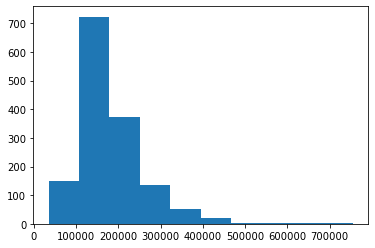

In [13]:

plt.hist(df_train['SalePrice'])

(array([205., 902., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

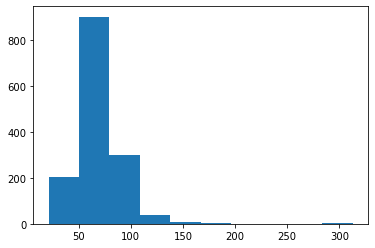

In [14]:
plt.hist(df_train['LotFrontage'])

(array([1.423e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <BarContainer object of 10 artists>)

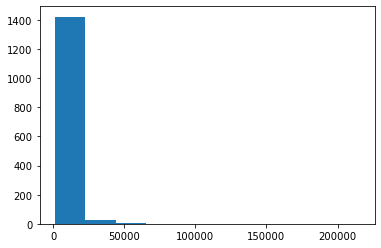

In [15]:
plt.hist(df_train['LotArea'])

In [16]:
df_train['LotArea'].mean()

10516.828082191782

In [17]:
df_train['TotRmsAbvGrd'].nunique()

12

In [18]:
# Encoding the Dataset
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe.fit(df_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
new_cols = list(ohe.get_feature_names())
new_cols

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_C (all)',
 'x0_FV',
 'x0_RH',
 'x0_RL',
 'x0_RM',
 'x1_Grvl',
 'x1_Pave',
 'x2_Grvl',
 'x2_NA',
 'x2_Pave',
 'x3_IR1',
 'x3_IR2',
 'x3_IR3',
 'x3_Reg',
 'x4_Bnk',
 'x4_HLS',
 'x4_Low',
 'x4_Lvl',
 'x5_AllPub',
 'x5_NoSeWa',
 'x6_Corner',
 'x6_CulDSac',
 'x6_FR2',
 'x6_FR3',
 'x6_Inside',
 'x7_Gtl',
 'x7_Mod',
 'x7_Sev',
 'x8_Blmngtn',
 'x8_Blueste',
 'x8_BrDale',
 'x8_BrkSide',
 'x8_ClearCr',
 'x8_CollgCr',
 'x8_Crawfor',
 'x8_Edwards',
 'x8_Gilbert',
 'x8_IDOTRR',
 'x8_MeadowV',
 'x8_Mitchel',
 'x8_NAmes',
 'x8_NPkVill',
 'x8_NWAmes',
 'x8_NoRidge',
 'x8_NridgHt',
 'x8_OldTown',
 'x8_SWISU',
 'x8_Sawyer',
 'x8_SawyerW',
 'x8_Somerst',
 'x8_StoneBr',
 'x8_Timber',
 'x8_Veenker',
 'x9_Artery',
 'x9_Feedr',
 'x9_Norm',
 'x9_PosA',
 'x9_PosN',
 'x9_RRAe',
 'x9_RRAn',
 'x9_RRNe',
 'x9_RRNn',
 'x10_Artery',
 'x10_Feedr',
 'x10_Norm',
 'x10_PosA',
 'x10_PosN',
 'x10_RRAe',
 'x10_RRAn',
 'x10_RRNn',
 'x11_1Fam',
 'x11_2fmCon',
 'x11_Duplex',
 'x11_Twnhs',
 'x11_TwnhsE',
 'x12_1.5Fin',
 '

In [20]:
df_train[new_cols] = ohe.transform(df_train[cat_cols])
df_test[new_cols] = ohe.transform(df_test[cat_cols])

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[new_cols] = ohe.transform(df_train[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[new_cols] = ohe.transform(df_test[cat_cols])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7452\1785779652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [21]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,1,60.0,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20.0,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60.0,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70.0,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60.0,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#choose best correlation with Saleprice
final_col=list(df_train.corr()['SalePrice'][(df_train.corr()['SalePrice']>=0.06)|(df_train.corr()['SalePrice']<=-0.06)].index)

In [23]:
final_col.remove('SalePrice')

In [24]:
len(final_col)

180

In [25]:
#Scalling
scaler=StandardScaler()

In [29]:
#fit and transform our data
df_train[final_col] =scaler.fit_transform(df_train[final_col])

In [30]:
df_test[final_col] = scaler.transform(df_test[final_col])

In [38]:
from sklearn.ensemble import GradientBoostingRegressor #Importing the Algorithm RandomForestRegressor from sklearn
from sklearn.model_selection import GridSearchCV# Hyper parameter tuning

In [39]:
# Assigning parameters for tuning
dict={'n_estimators':[200,300],
       'max_depth':[4,5],
       'min_samples_leaf':[2,3],
       'min_samples_split':[5,6,7]}

In [40]:
grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators =400, max_depth =5,min_samples_leaf=5,min_samples_split=2,learning_rate=0.1,random_state=78), param_grid=dict,cv=5,verbose=3)

In [42]:
grid_cv.fit(df_train[final_col],df_train['SalePrice'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.902 total time=   3.0s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.823 total time=   2.7s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.896 total time=   3.2s
[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.907 total time=   3.1s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.894 total time=   2.9s
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.904 total time=   4.6s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.823 total time=   4.7s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.897 total time=   5.4s
[C

[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.902 total time=   5.0s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.866 total time=   3.2s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.896 total time=   3.3s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.910 total time=   3.3s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.875 total time=   3.4s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.902 total time=   5.2s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.866 total time=   4.9s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.896 total time=   5.1s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5,
                                                 min_samples_leaf=5,
                                                 n_estimators=400,
                                                 random_state=78),
             param_grid={'max_depth': [4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [200, 300]},
             verbose=3)

In [44]:
yp1=grid_cv.predict(df_test[final_col])

In [45]:
df_submission1 = pd.DataFrame({'Id':df_test['Id'], 'SalePrice':yp1})

In [46]:
df_submission1.to_csv('Gb.csv', index=False)